In [2]:
import numpy as np
import matplotlib.pyplot as plt
import dtuimldmtools as dtu

# Seeds project

In [5]:
data_path = "data/"
seeds_dataset = "seeds_dataset.txt"
dataset_file = data_path + seeds_dataset

### Import data

In [10]:
data = np.loadtxt(dataset_file)
# Validate shape of the dataset, 210 rows with 8 attributes
data.shape

(210, 8)

### Convert dataset based on course conventions
![Course conventions](images/course_conventions.png)

#### Data Fields
Dataset obtained from https://archive.ics.uci.edu/dataset/236/seeds 
* area_A: tensor containing an area of the wheat grains
* perimeter_P: tensor containing the perimeter of the wheat grains
* compactness_C: tensor containing compactness of the wheat grains
* length_of_kernel: tensor containing the length of each wheat kernel
* width_of_kernel: tensor containing the width of each wheat kernel
* asymmetry_coefficient: tensor containing asymmetry coefficient of a wheat kernel
* length_of_kernel_groove: tensor containing a length of a kernel groove

In [15]:
X = data
# attributeNames are not present in the dataset, just gonna hardcode based on the website
attributeNames = ["area_A", "perimeter_P", "compactness_C", "length_of_kernel", "width_of_kernel", "asymmetry_coefficient", "length_of_kernel_groove", "class"]
N = data.shape[0]
M = data.shape[1]
y = X[:, -1]
# This is derived from the website
classNames = ["Kama", "Rosa", "Canadian"]
C = len(classNames)
# TODO Based on our use case, y.shape can be either (210, ) or (210, 1)
attributeNames, N, M, y, y.shape, classNames, C

(['area_A',
  'perimeter_P',
  'compactness_C',
  'length_of_kernel',
  'width_of_kernel',
  'asymmetry_coefficient',
  'length_of_kernel_groove',
  'class'],
 210,
 8,
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,

### Basic plots

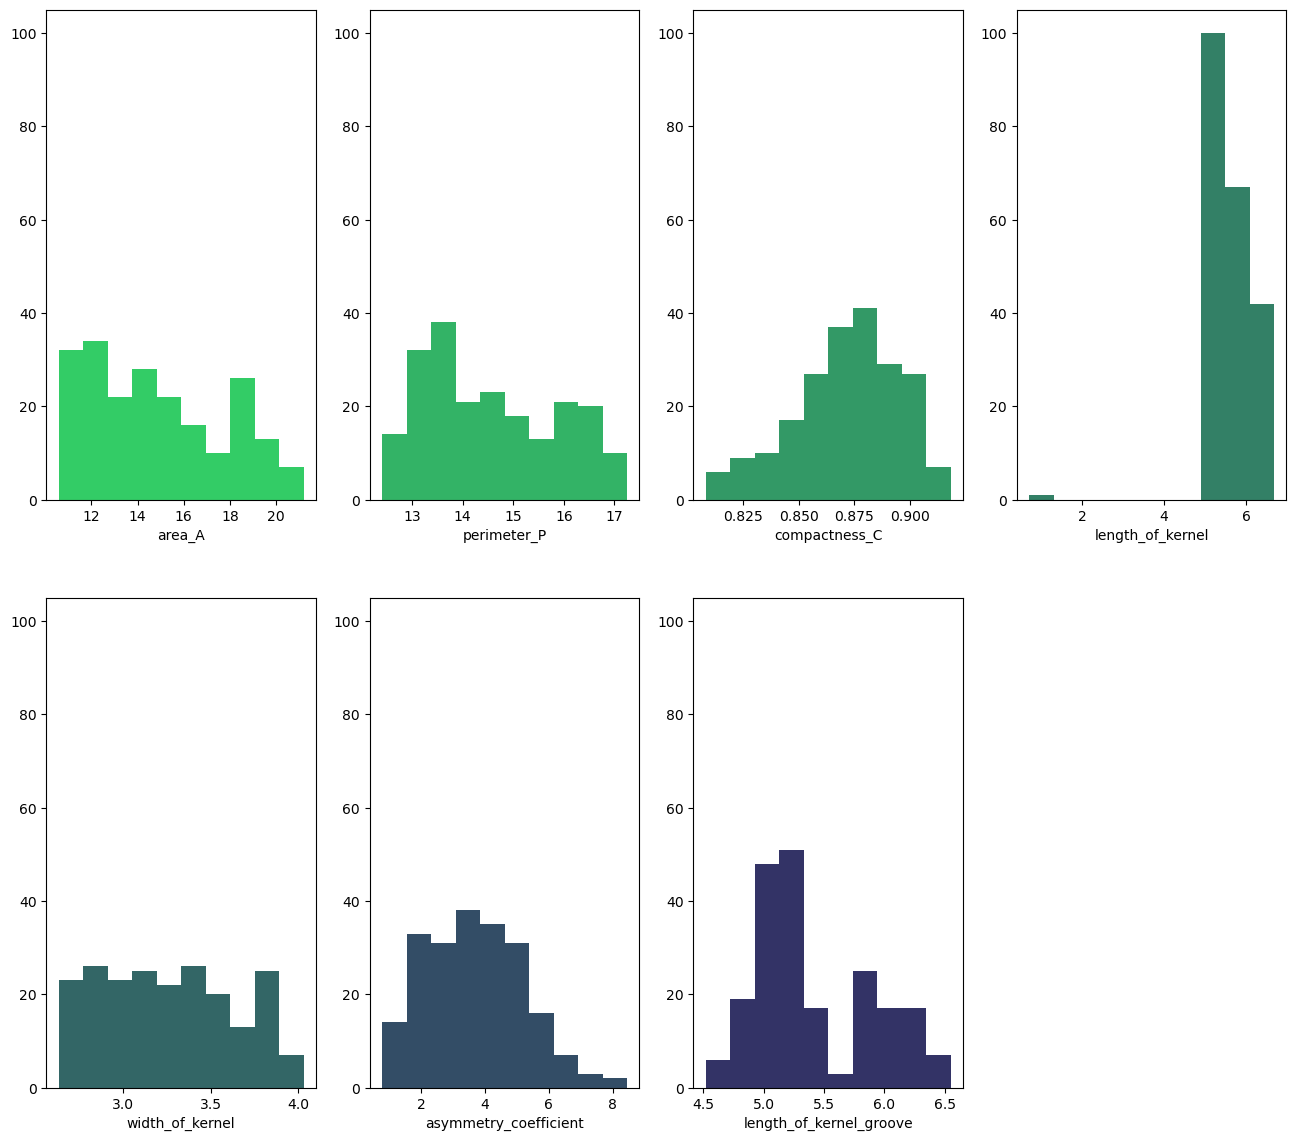

In [20]:
plt.figure(figsize=(16, 14))
# Exclude the last data point because not necessary to plot classes in histogram
numData = M - 1 
u = np.floor(np.sqrt(numData))
v = np.ceil(float(numData) / u)
for i in range(numData):
    plt.subplot(int(u), int(v), i + 1)
    plt.hist(X[:, i], color=(0.2, 0.8 - i * 0.1, 0.4))
    plt.xlabel(attributeNames[i])
    plt.ylim(0, N / 2)

plt.show()

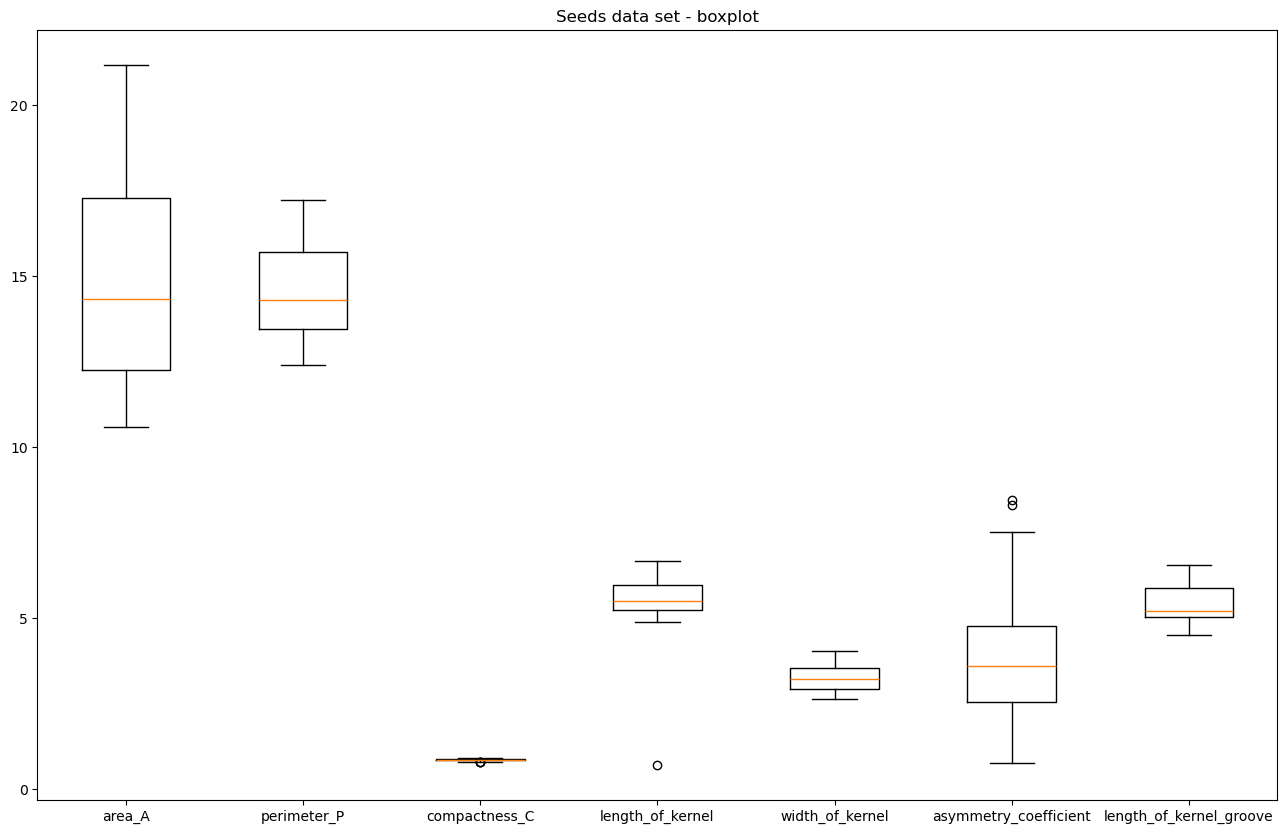

In [53]:
plt.figure(figsize=(16, 10))
plt.boxplot(X[:, :-1])
plt.xticks(range(1, numData+1), attributeNames[:-1])
plt.title("Seeds data set - boxplot")
plt.show()

# Note: Currently, there is an inconsistency in the indexing of classes. The classes are labeled starting from 1, but the code is designed to work with zero-based indexing (i.e., starting from 0). To resolve this, we have two options:

* Shift the class labels to start from 0 to align with the code's expectations.

* Keep the current labeling (starting from 1) and modify the code to handle one-based indexing.


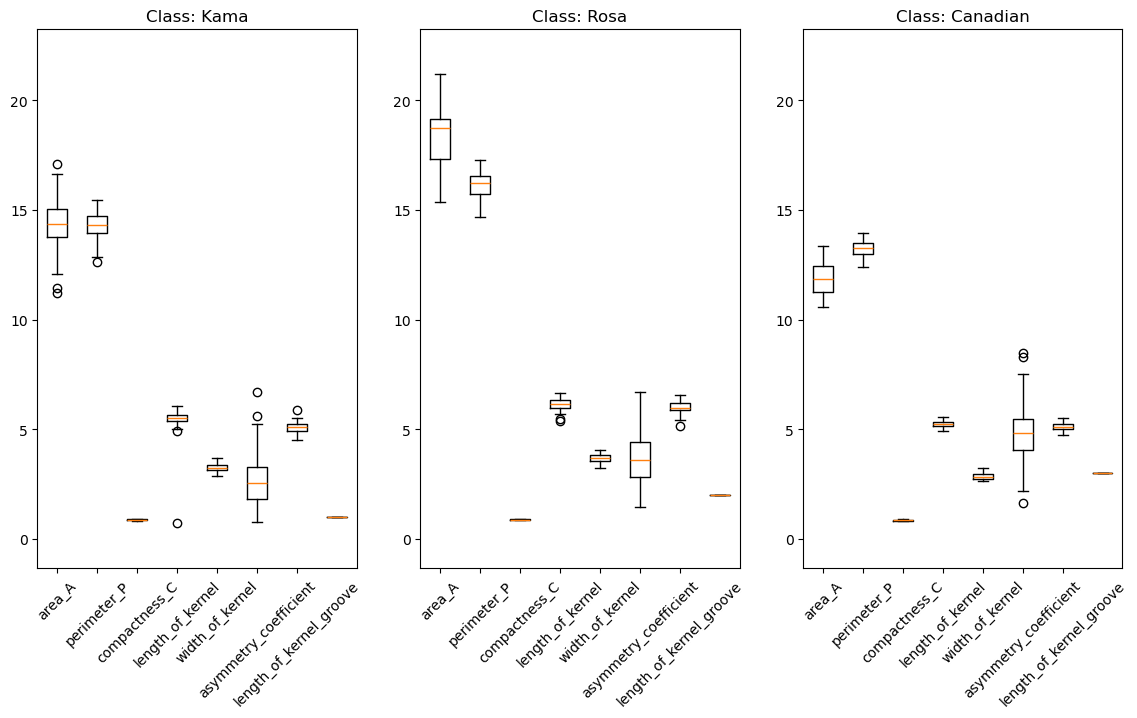

In [66]:
plt.figure(figsize=(14, 7))
for c in range(1, C + 1):
    plt.subplot(1, C, c)
    class_mask = y == c
    plt.boxplot(X[class_mask, :])
    plt.title("Class: " + classNames[c-1])
    plt.xticks(range(1, numData + 1), attributeNames[:-1], rotation=45)
    y_up = X.max() + (X.max() - X.min()) * 0.1
    y_down = X.min() - (X.max() - X.min()) * 0.1
    plt.ylim(y_down, y_up)

plt.show()